<a href="https://colab.research.google.com/github/boramkim0514/python01/blob/main/D22_02_%EB%B6%80%EB%8F%99%EC%82%B0%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%8B%9C%EA%B0%81%ED%99%94ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild() # matplotlib 폰트 재구성 한글 깨질때 수정
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

In [ ]:
import pandas as pd

df = pd.read_csv("/content/house-price-clean (1).csv")
df.head()

,지역명,규모구분,연도,월,분양가격
0,서울,전체,2015,10,5841
1,서울,60㎡이하,2015,10,5652
2,서울,60㎡초과 85㎡이하,2015,10,5882
3,서울,85㎡초과 102㎡이하,2015,10,5721
4,서울,102㎡초과,2015,10,5879


규모구분이 전체인 행 빼기

In [ ]:
#1. 삭제할 인덱스 얻어내기 
drop_idx = df.loc[df['규모구분'] == '전체' ].index # '규모구분'
drop_idx

Int64Index([   0,    5,   10,   15,   20,   25,   28,   32,   37,   42,
            ...
            4142, 4145, 4149, 4154, 4159, 4164, 4169, 4173, 4177, 4181],
           dtype='int64', length=892)

In [ ]:
# 2단계 drop
df = df.drop(drop_idx)
df.head()

,지역명,규모구분,연도,월,분양가격
1,서울,60㎡이하,2015,10,5652
2,서울,60㎡초과 85㎡이하,2015,10,5882
3,서울,85㎡초과 102㎡이하,2015,10,5721
4,서울,102㎡초과,2015,10,5879
6,인천,60㎡이하,2015,10,3488


인덱스 재설정

In [ ]:
df = df.reset_index(drop=True)
df.head()

그래프 시각화 
x 축 인덱스 y축 그 값

In [ ]:
df.plot()

선택사항 
그래프 크기조절

In [ ]:
#그래프 크기 키워서 따로 설정하지 않는 한은 고정될 수 있도록
plt.rcParams["figure.figsize"] = (12, 9) #가로, 세로 인치

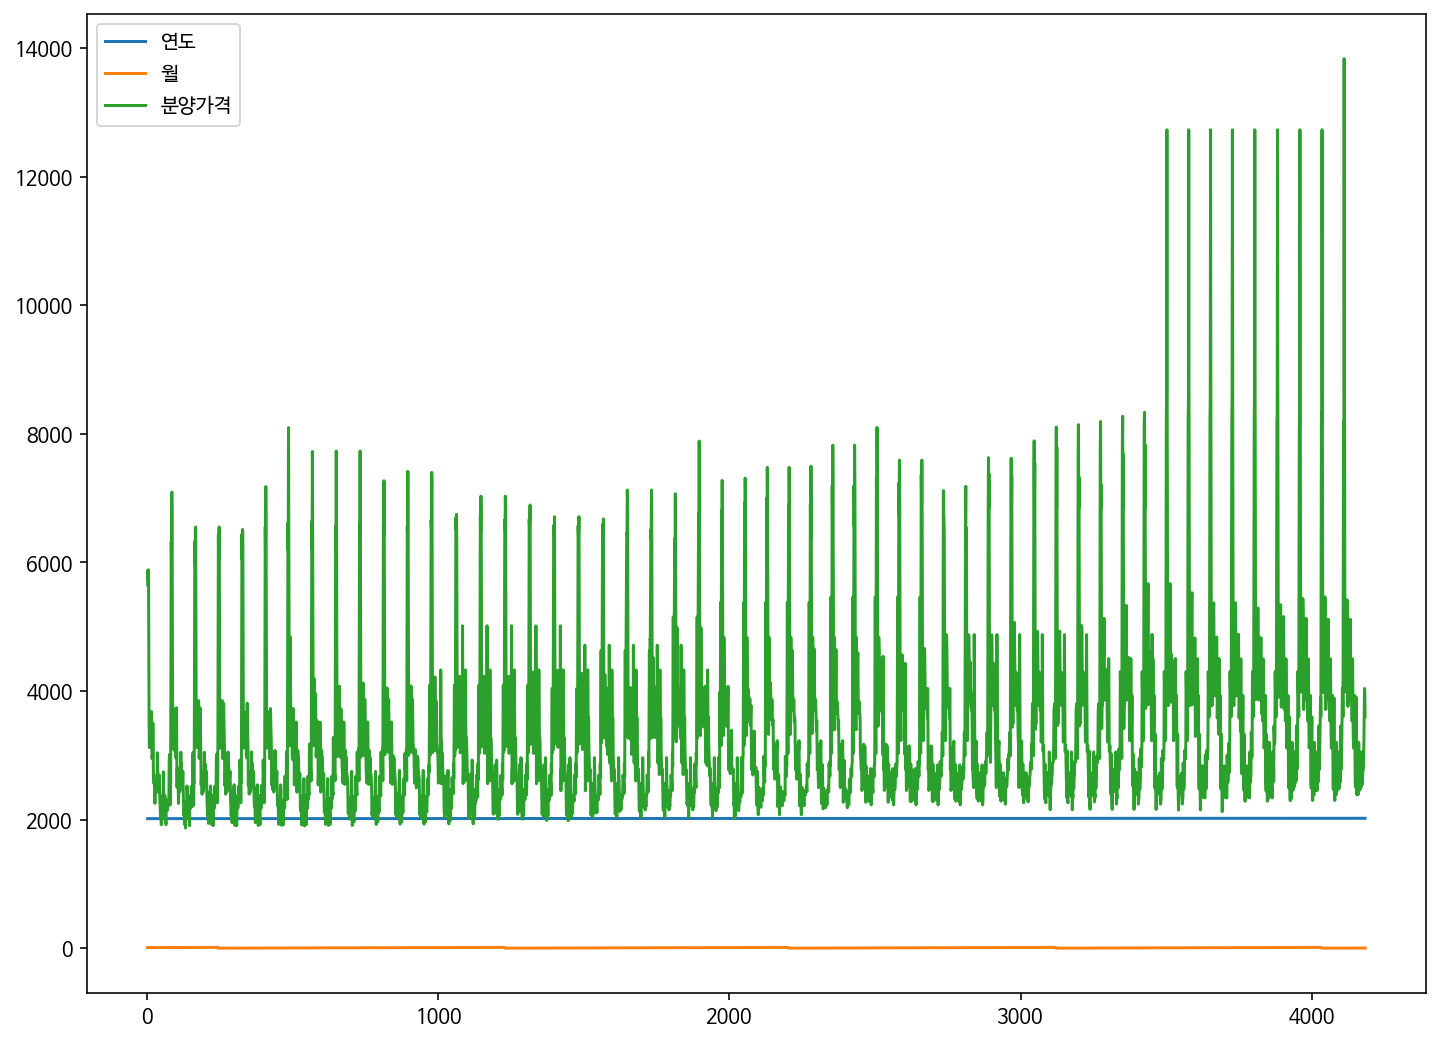

In [ ]:
df.plot()

**pandas 데이터 프레임에서 그래프 그리기

#1. Plot graph
* line graph
* use 'kind' option to draw graph you want
* line : line graph
* bar : bar graph defalut -> vertical
* barh : bar horizontal
* hist : histogram 
* kde : kernal density  커널 밀도 그래프 
* hexbin: 고밀도 산점도 그래프 
* area
* pie
* scatter 산점도 그래프

In [ ]:
# 1. line graph
* line 그래프 데이터가 연속적 특징 띄고 있을 때
    * 시계열 데이터(Time series)
        * 유전자 데이터 : 순서 바뀌면 아예 의미를 잃어버림( 텍스트 ) 보통 bar graph로 표시됨
* 일정 시간의 흐름에 따라 수집된 데이터 (날씨 데이터) 

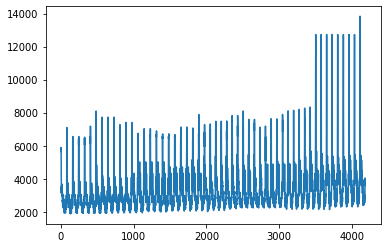

In [ ]:
# x 축 datafrme 
df['분양가격'].plot(kind='line')

In [ ]:
df_seoul = df.loc[df['지역명'] == '서울']
df_seoul.head()

,지역명,규모구분,연도,월,분양가격
1,서울,60㎡이하,2015,10,5652
2,서울,60㎡초과 85㎡이하,2015,10,5882
3,서울,85㎡초과 102㎡이하,2015,10,5721
4,서울,102㎡초과,2015,10,5879
82,서울,60㎡이하,2015,11,6320


In [ ]:
#연도별 분양가 평균
df_seoul_year = df_seoul.groupby("연도")["분양가격"].mean()
df_seoul_year

연도
2015    6201.000000
2016    6674.520833
2017    6658.729167
2018    7054.687500
2019    8735.083333
2020    9647.375000
Name: 분양가격, dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)


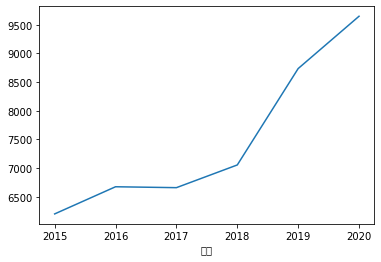

In [ ]:
df_seoul_year.plot(kind= 'line')

In [ ]:
# 지역별 분양가격 평균
local_price_mean = df. groupby("지역명")["분양가격"].mean()
local_price_mean

지역명
강원    2448.156863
경기    4133.952830
경남    2858.932367
경북    2570.465000
광주    3055.043750
대구    3679.620690
대전    3176.127389
부산    3691.981132
서울    7308.943396
세종    2983.543147
울산    2990.373913
인천    3684.302885
전남    2326.250000
전북    2381.416268
제주    3472.677966
충남    2534.950000
충북    2348.183962
Name: 분양가격, dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48513 missing from current font.
  font.set_

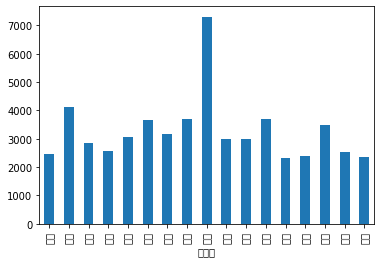

In [ ]:
local_price_mean.plot(kind='bar')

In [ ]:
#분양가격 내림차순으로 정렬해서 확인
local_price_mean_sorted = local_price_mean.sort_values(ascending=False)
local_price_mean_sorted.plot(kind='bar')

## barh
    * 인덱스였던 x 축이 y 축으로 이동

In [ ]:
local_price_mean_sorted.plot(kind='barh')

보이는건 오름차순 같지만 y축의 시작이 아래부터여서 이렇게 그려짐

#Histogram
**분포-빈도**를 시각화해서 보여줌
* 가로축에 분포(데이터)
* 세로축엔 빈도 가로축(구각)에 데이터 값 보여줌

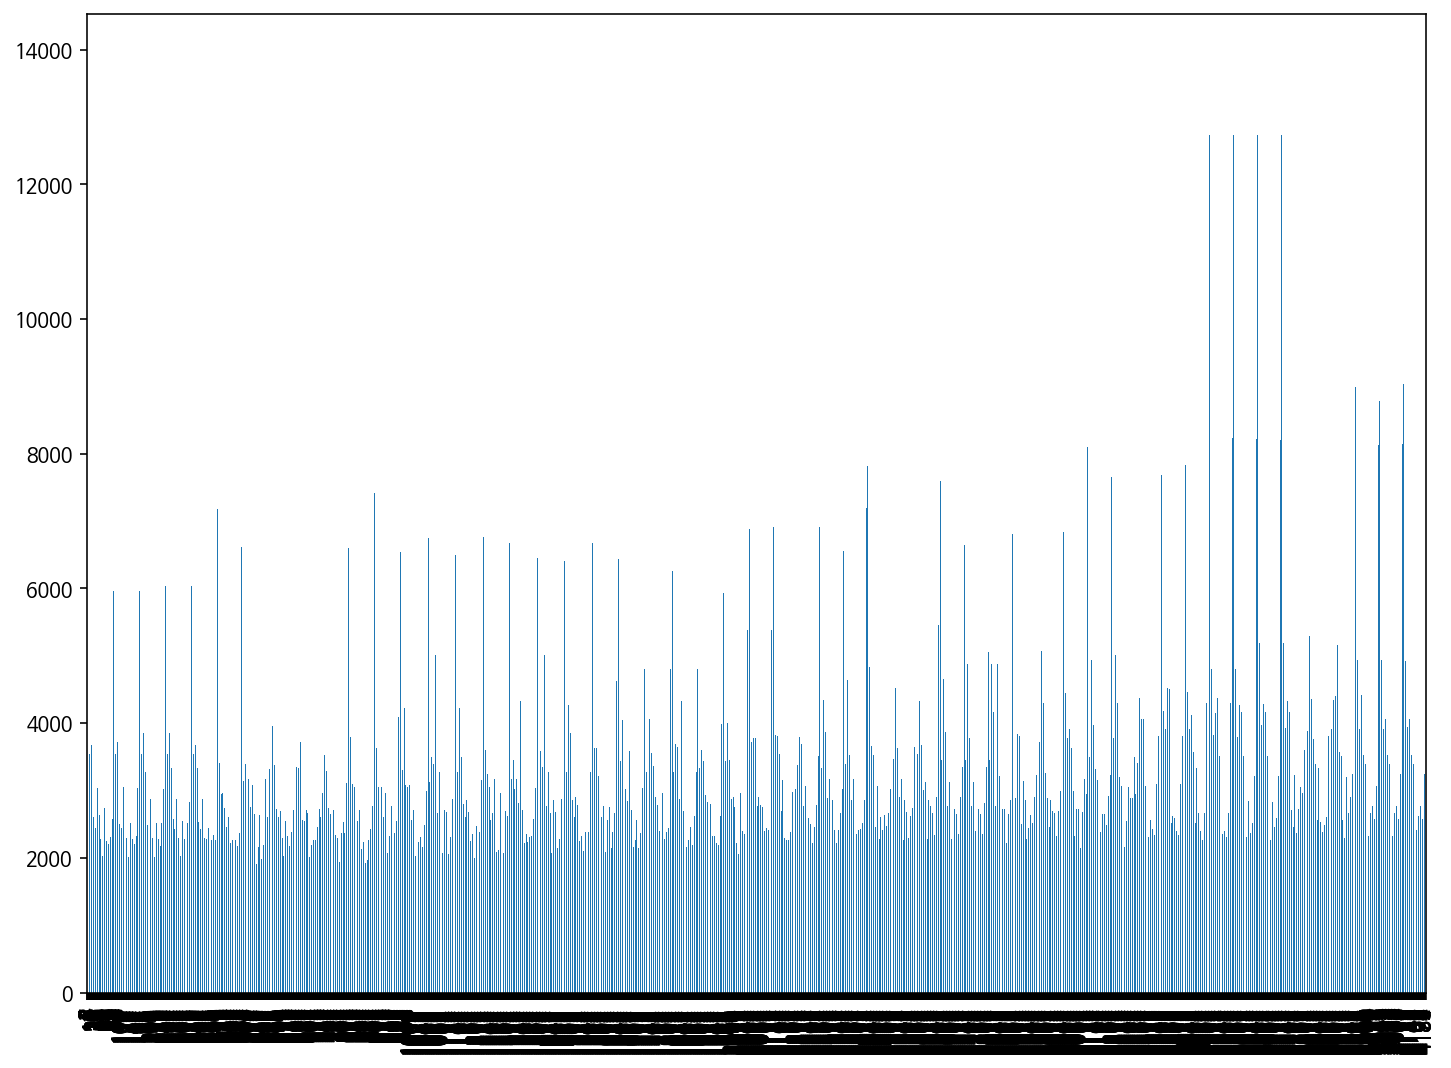

In [ ]:
#분양가격의 구간별 빈도수
df['분양가격'].plot(kind='bar')

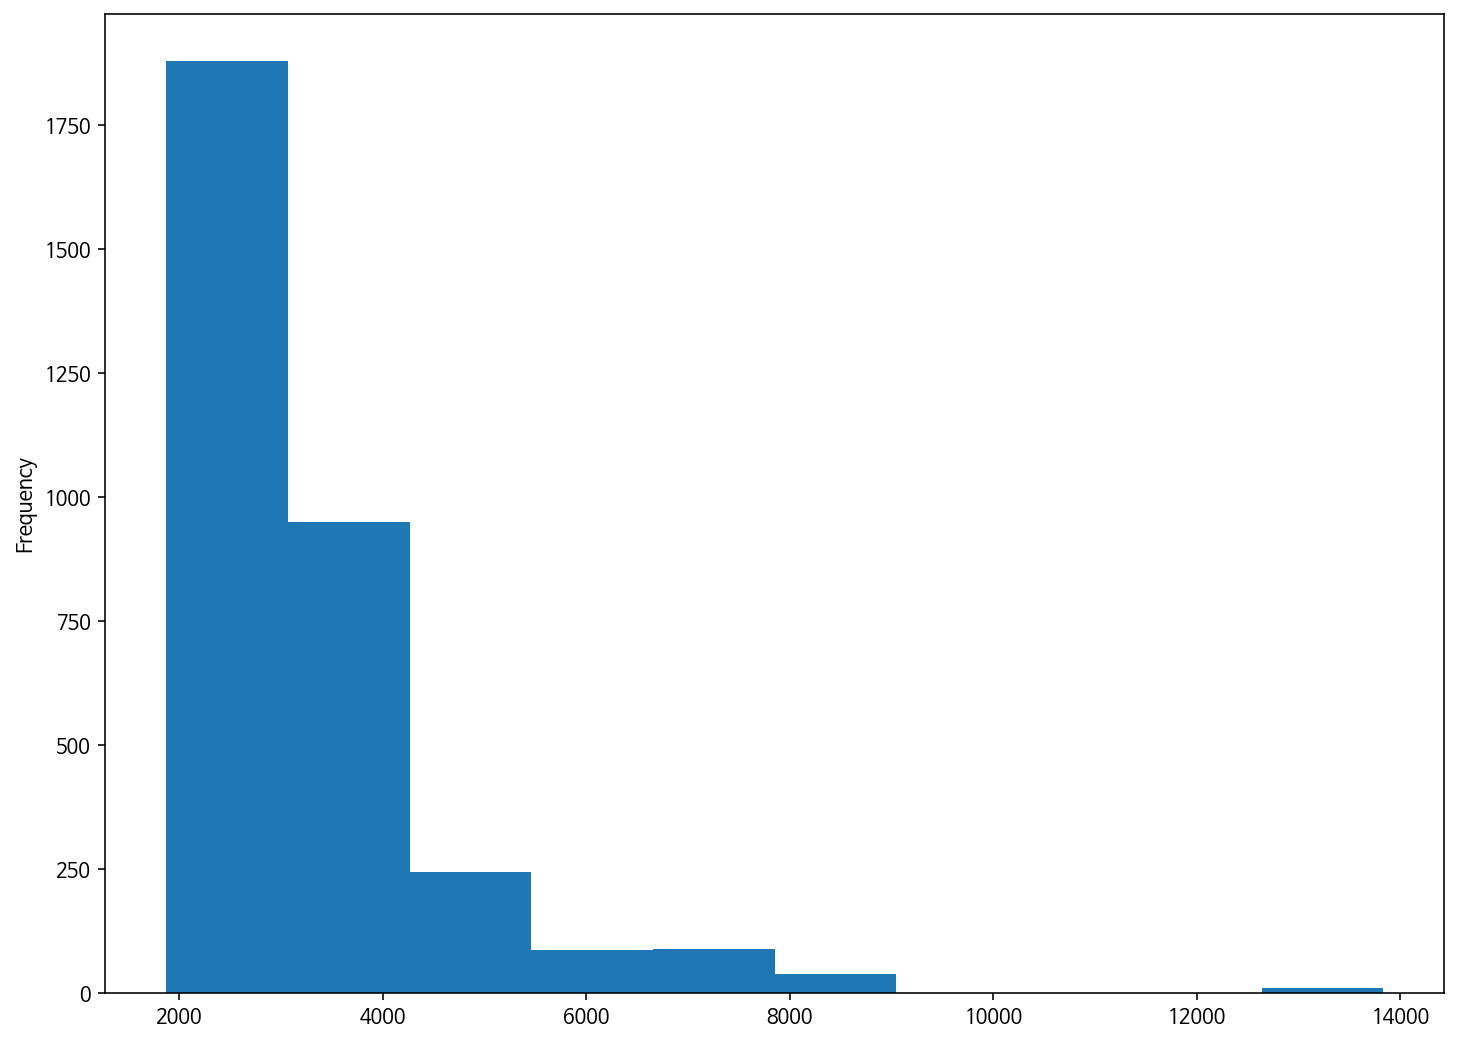

In [ ]:
#분양가격의 구간별 빈도수
df['분양가격'].plot(kind='hist')

#커널 밀도 그래프
*히스토그램과 유사하게 밀도를 보여주는 그래프
* 히스토 그램과 유사한 모양 but 부드러운 라인

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


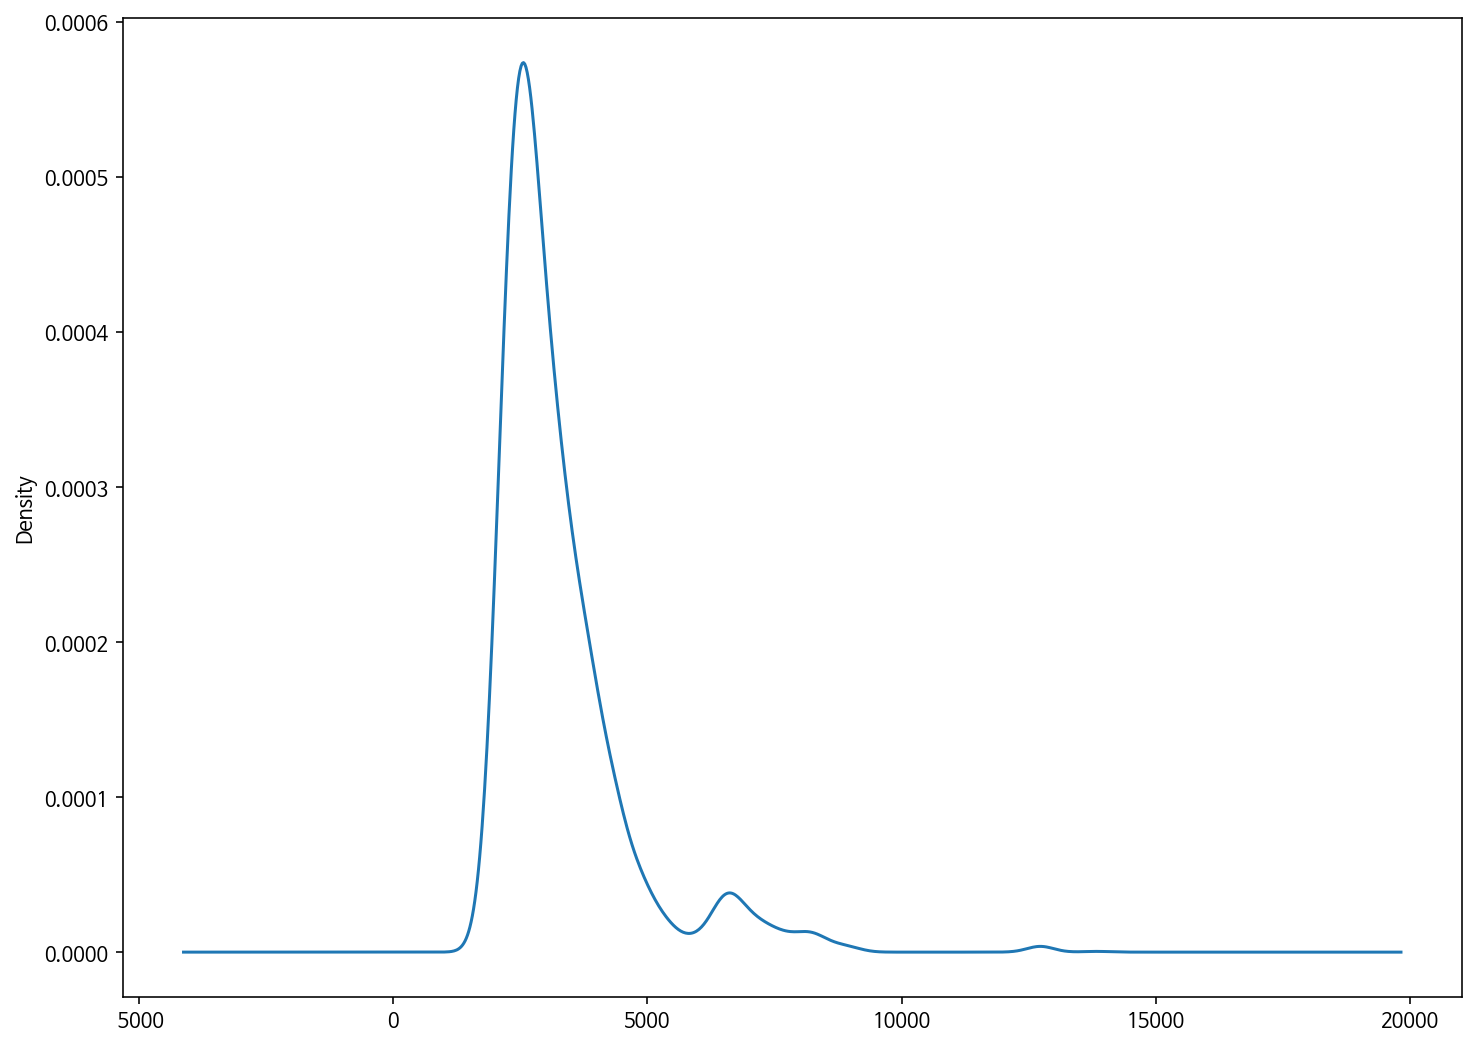

In [ ]:
df['분양가격'].plot(kind='kde') #Kernel Density Estimation

#Hexbin
* 고밀도 산점도 그래프
* x, y 모두 넣어줌
    * 둘다 numeric 값
* 데이터의 밀(집)도 추정

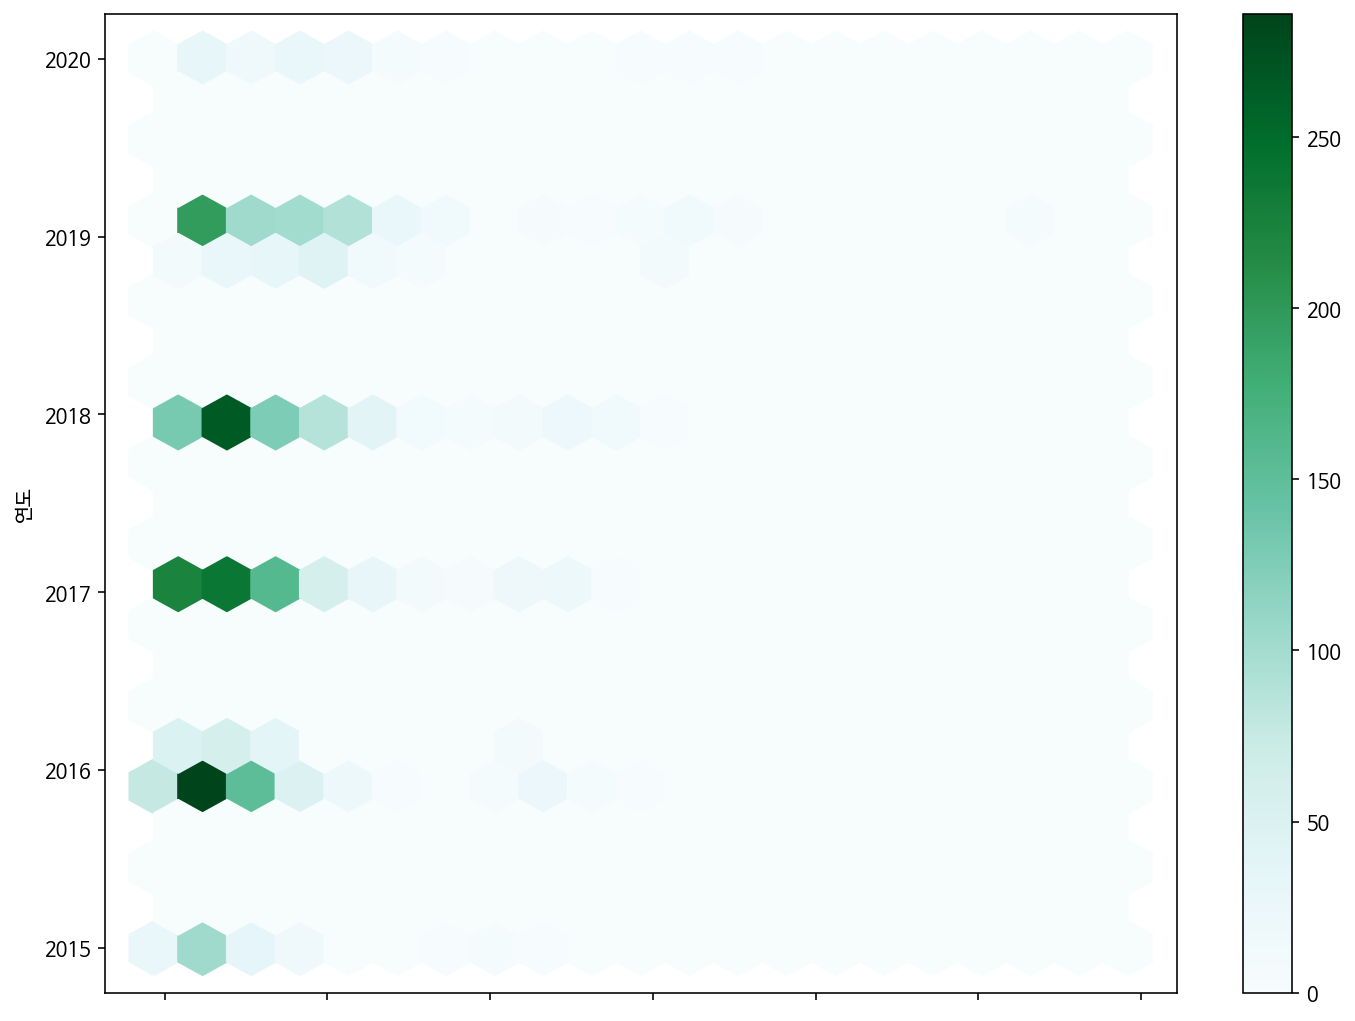

In [ ]:
df.plot(kind='hexbin', x = '분양가격', y = '연도', gridsize = 20)

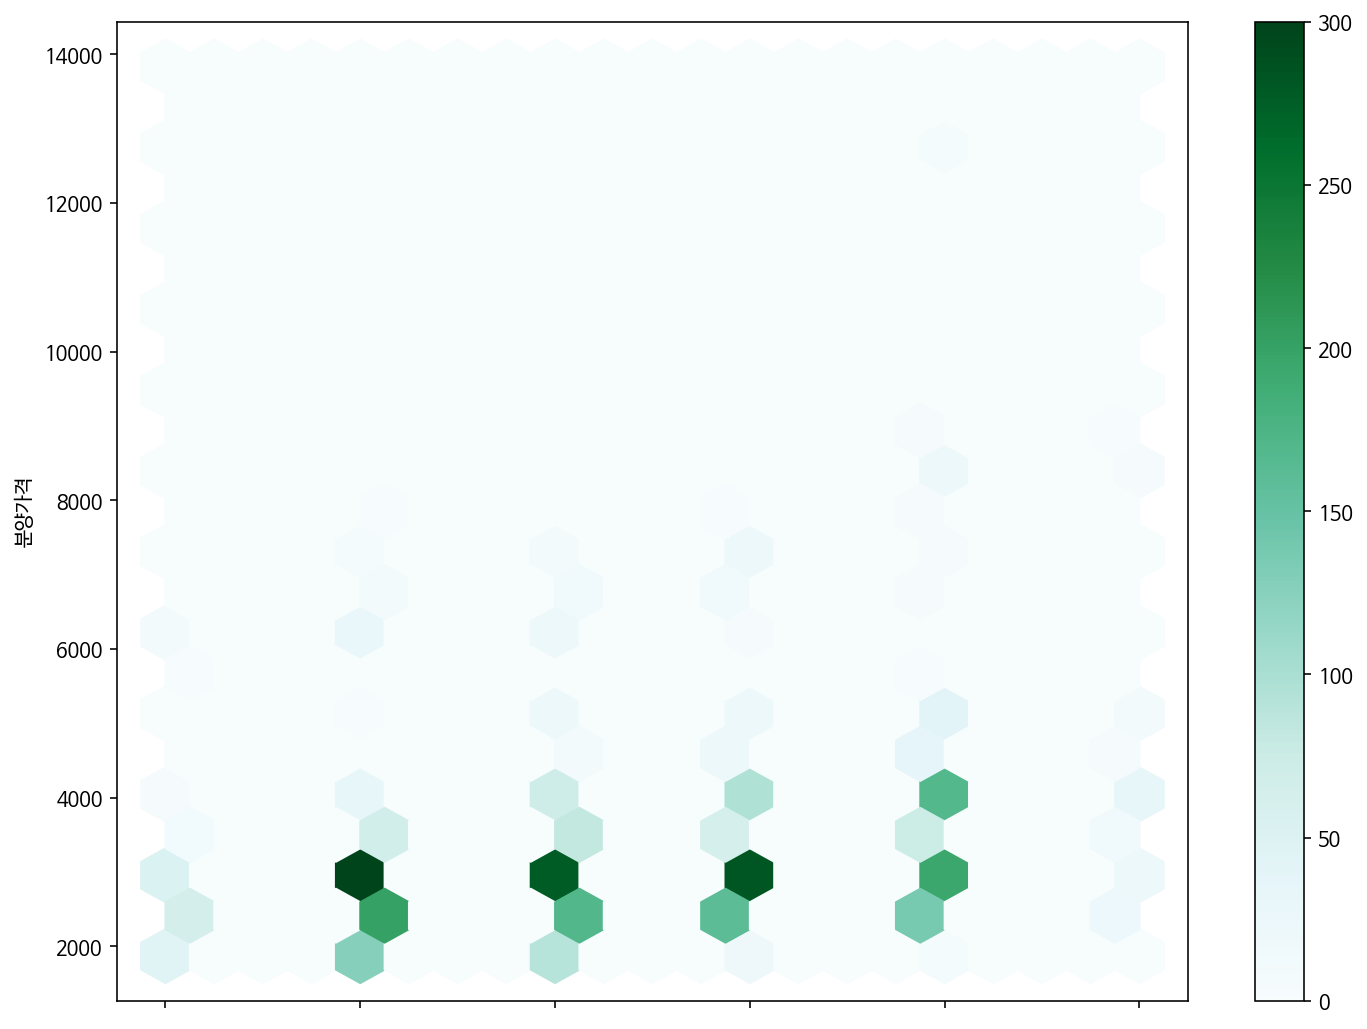

In [ ]:
df.plot(kind='hexbin', y = '분양가격', x = '연도', gridsize = 20)

# Box Plot
* data visualization of max, min, mean, median 
* easy to spot a 'outlier'


In [ ]:
df_seoul = df.loc[df['지역명' == '서울']]
df_seoul.head()

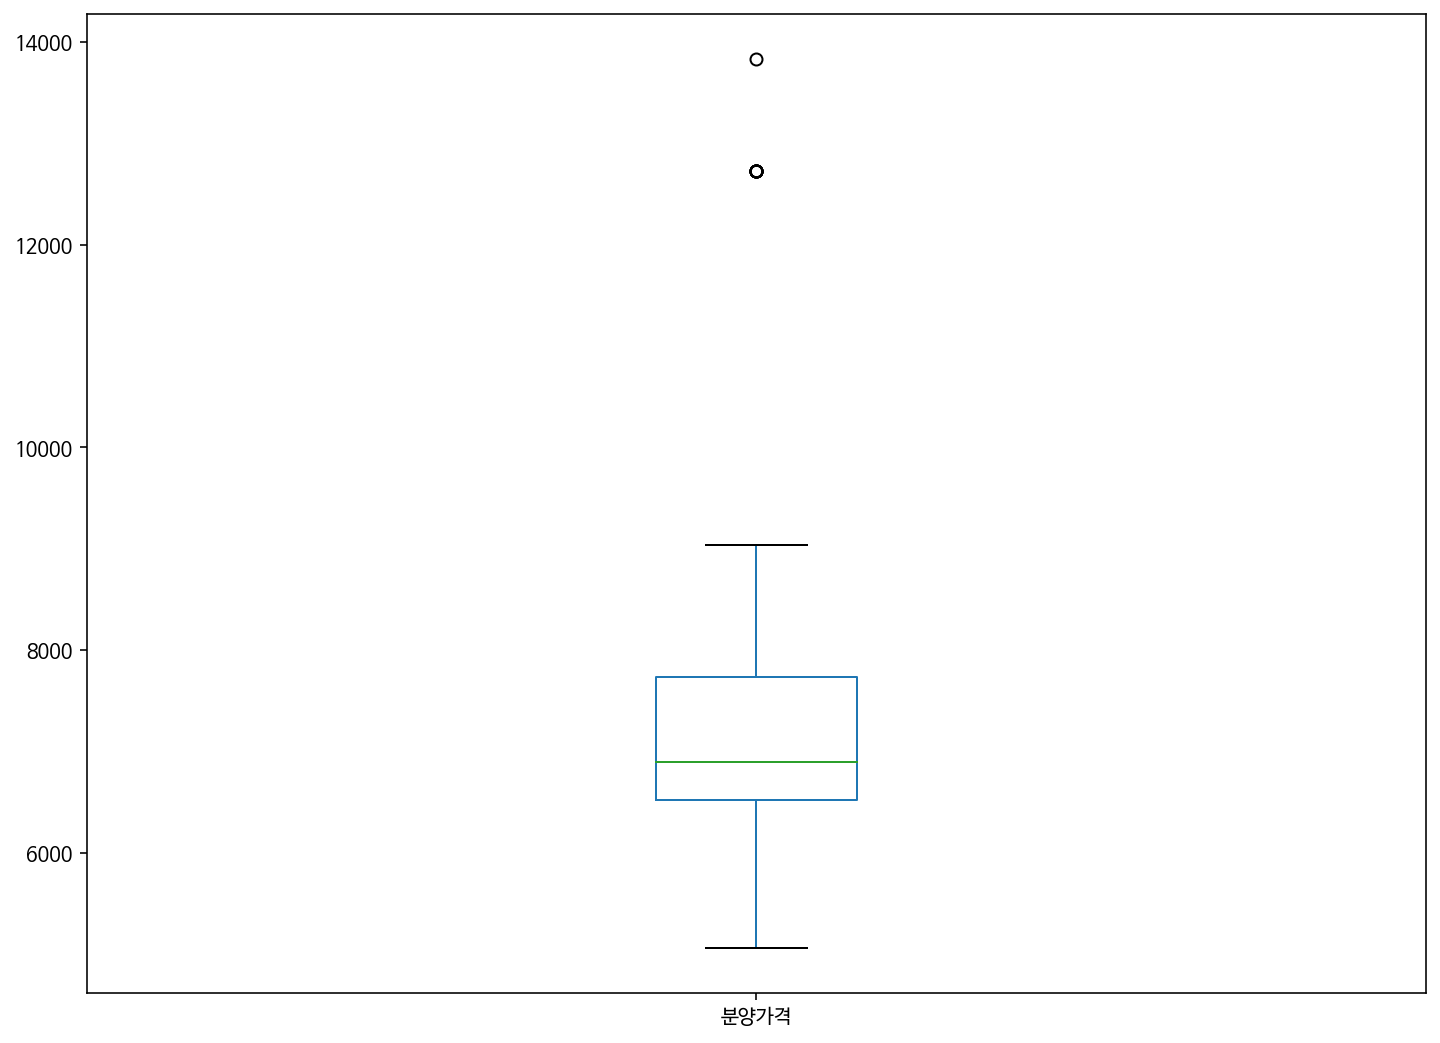

In [ ]:
df_seoul["분양가격"].plot(kind = 'box') 
#two spots above the box -> outliter , green line in the box => median (middle of datas set) 
#짝수일 경우 높은 값 가져옴 1, 2, 3, 7, 10, 13, 15
#min=1, ,2= 25%, median =7, 75% = 13, max =15

In [ ]:
df_seoul.describe()["분양가격"]

count      212.000000
mean      7308.943396
std       1402.869496
min       5061.000000
25%       6519.750000
50%       6895.500000
75%       7732.000000
max      13835.000000
Name: 분양가격, dtype: float64

In [ ]:
#IQR = (Q3-Q1)*1.5 #inter quantal range
Q3 = 7732
Q1 = 6519.75
IQR = (Q3-Q1) * 1.5
IQR #box plot 선길이

1818.375

In [ ]:
#최대범위
Q3 + IQR

9550.375

In [ ]:
#최소범위 
Q1 - IQR

4701.375

# Box plot 
This type of plot is used to easily detect outlier

#Area 
coloring the below part of line graph

In [ ]:
#월별 분양가격 갯수
price_by_month_count = df.groupby("월")["분양가격"].count()
price_by_month_count

월
1     308
2     307
3     246
4     251
5     251
6     250
7     248
8     248
9     248
10    316
11    312
12    308
Name: 분양가격, dtype: int64

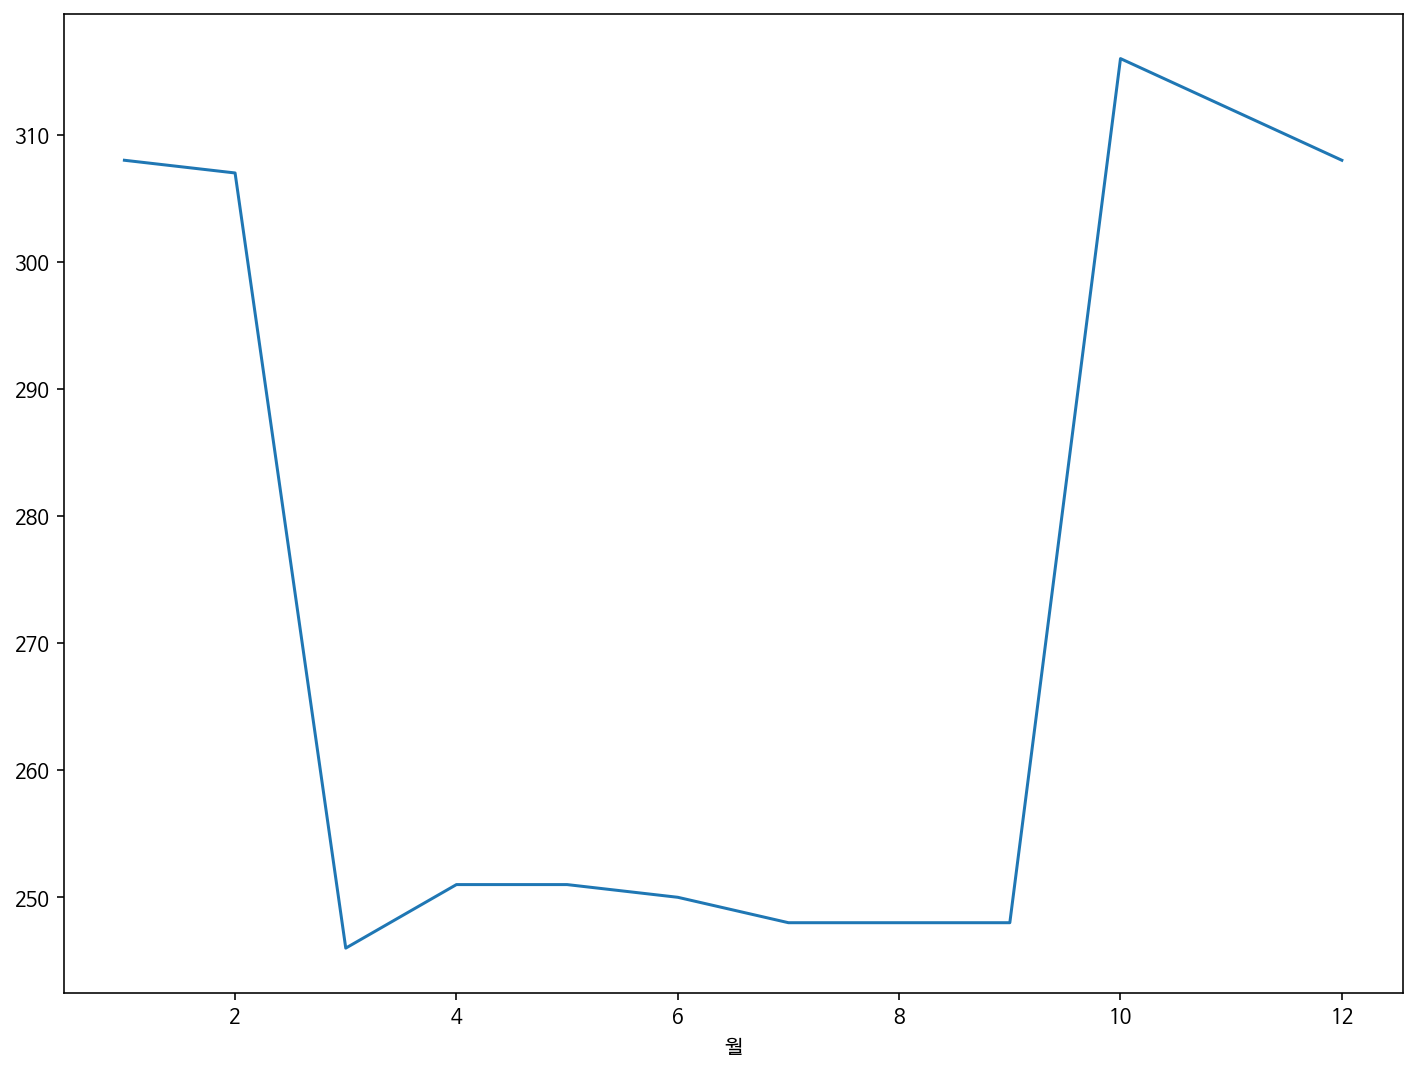

In [ ]:
price_by_month_count.plot(kind = 'line')

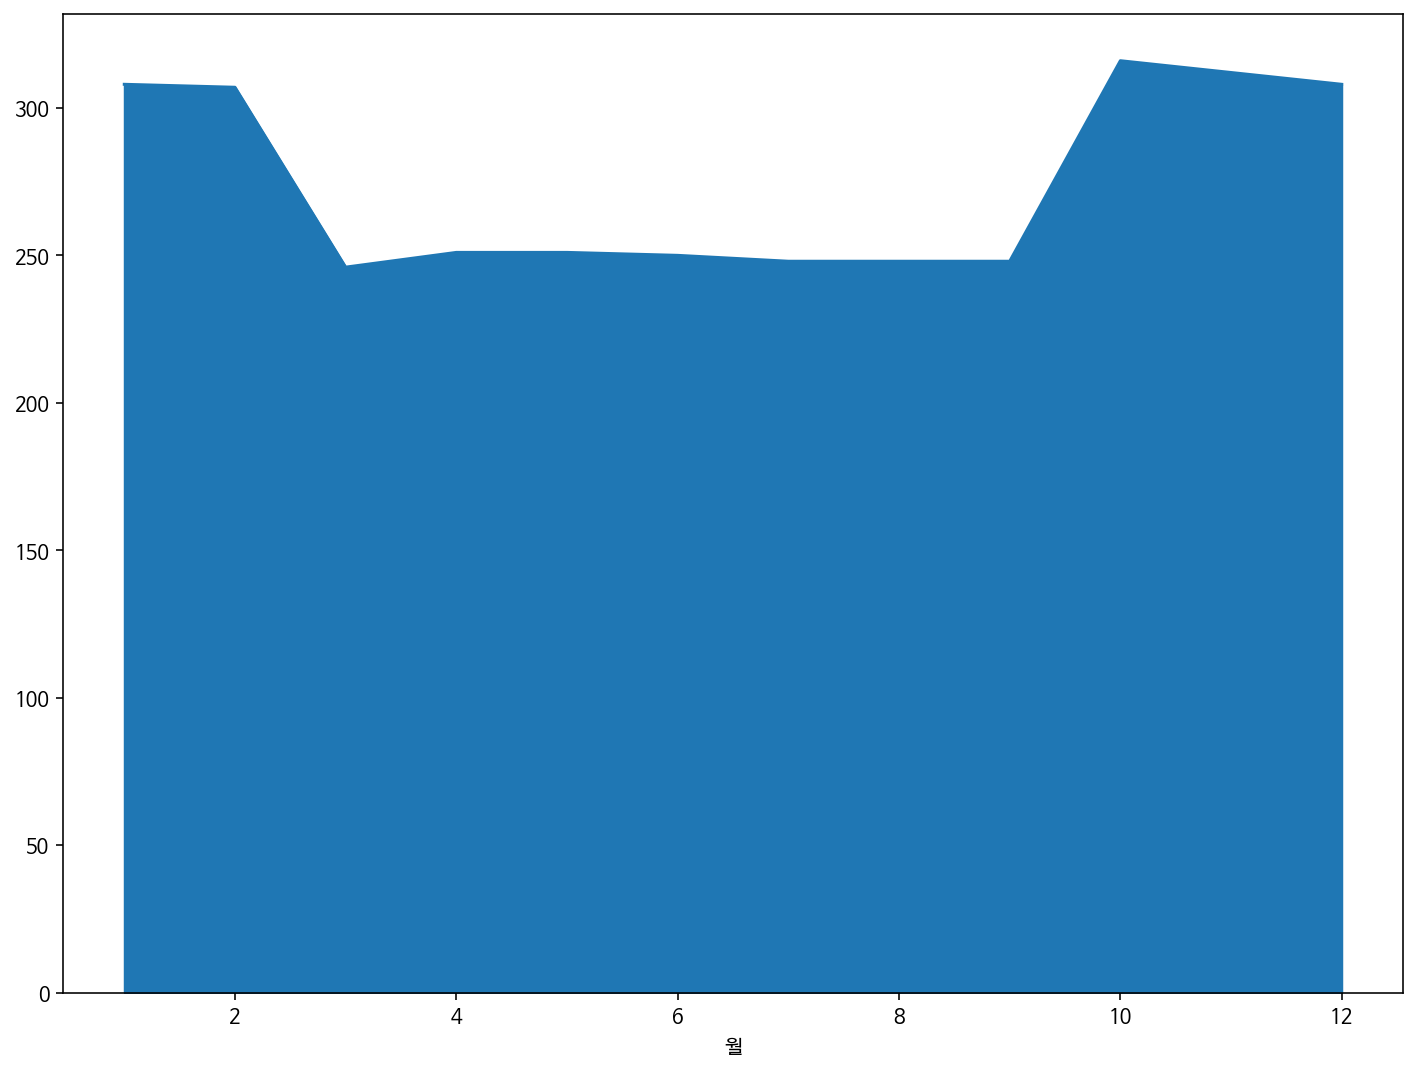

In [ ]:
price_by_month_count.plot(kind = 'area')

In [ ]:
# 연도별 분양가격 pie graph

price_by_year = df.groupby("연도")["분양가격"].count()
price_by_year

연도
2015    192
2016    780
2017    771
2018    716
2019    716
2020    118
Name: 분양가격, dtype: int64

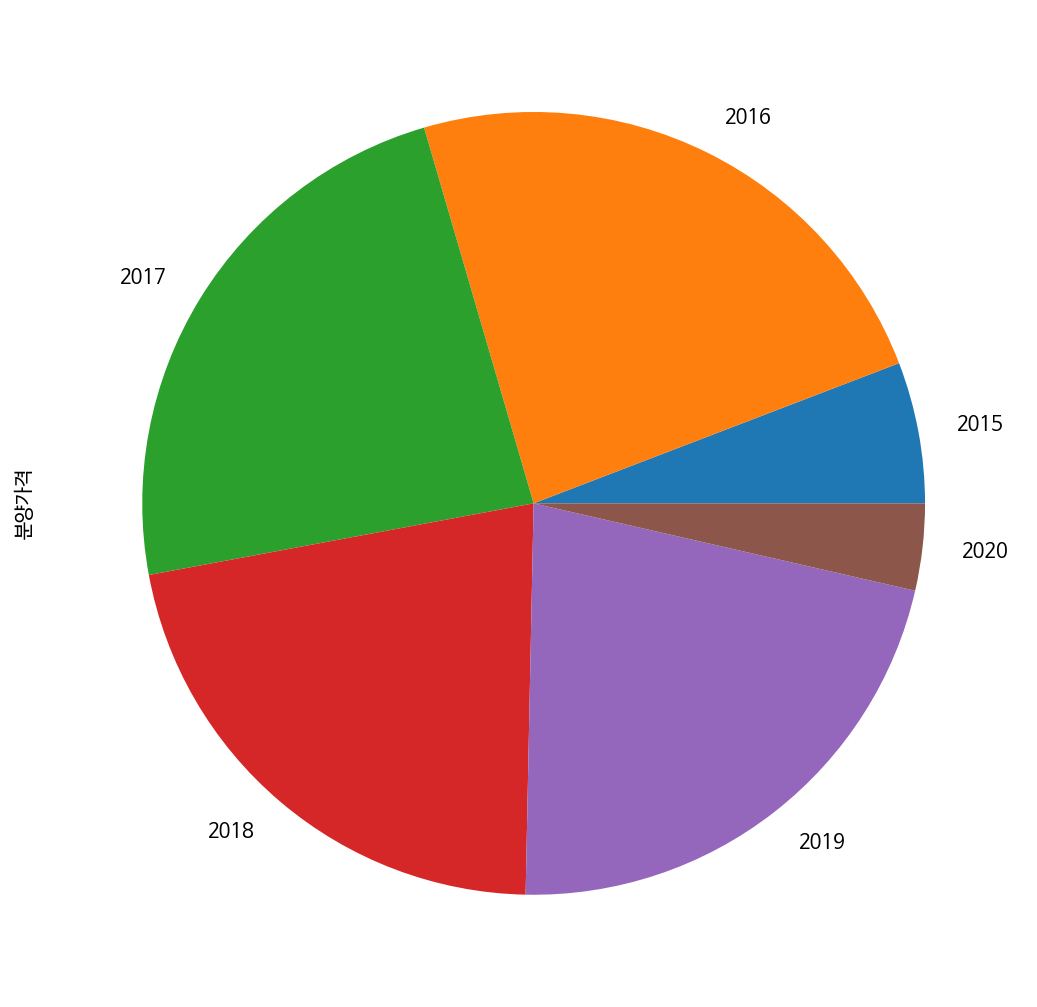

In [ ]:
price_by_year.plot(kind='pie') # 비즈니스적 점유율(목적과 가설에 따라)을 알아볼때 쓰지만, 데이터분석시 효용석이 없기 때문에 잘 안씀 

# Scatter Plot(산점도 그래프)
* describe data set as dots
* x, y numeric values
* 분포도 확인용

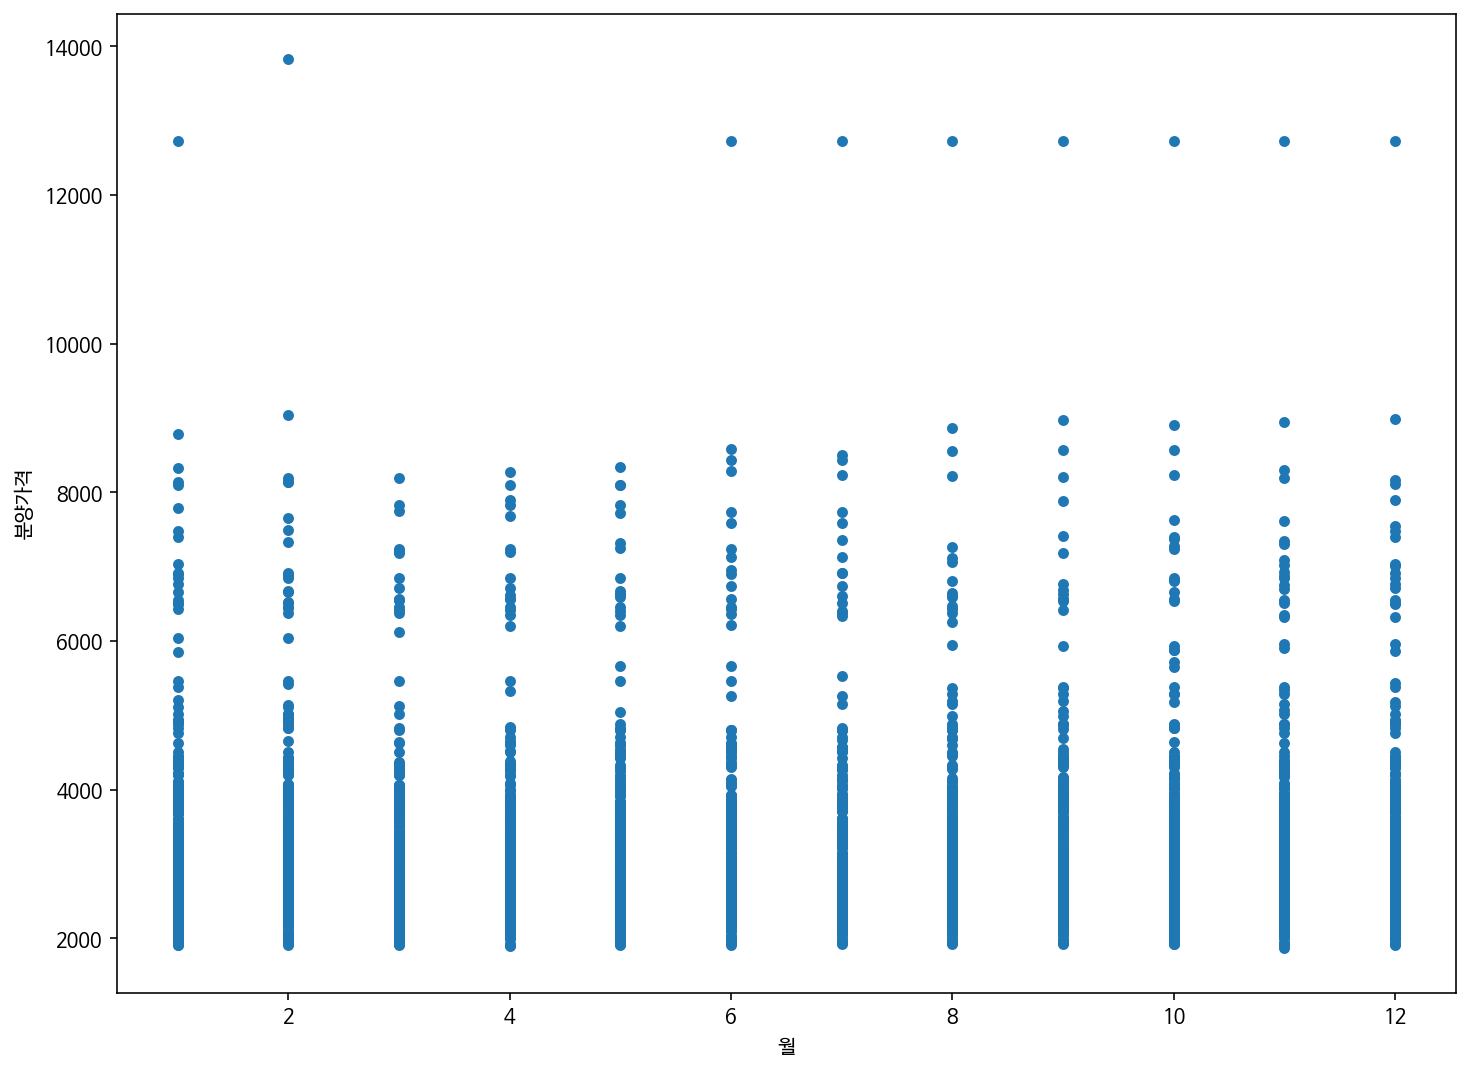

In [ ]:
df.plot(x='월', y='분양가격', kind='scatter')